Memprediksi salah satu saham indeks LQ45 (^JKLQ45) menggunakan metode LSTM

In [ ]:
#Import library yang digunakan
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#akses data
df = web.DataReader('^JKLQ45', data_source='yahoo', start='2013-01-01', end='2021-05-21' )
#tampilkan data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,746.229980,735.200012,736.549988,742.789978,1.429800e+09,742.789978
2013-01-03,755.059998,745.340027,745.340027,753.130005,2.050900e+09,753.130005
2013-01-04,756.119995,750.190002,755.099976,753.880005,1.633500e+09,753.880005
2013-01-07,758.400024,750.309998,753.289978,750.659973,1.721900e+09,750.659973
2013-01-08,755.510010,748.849976,751.270020,752.219971,2.364800e+09,752.219971
...,...,...,...,...,...,...
2021-05-17,887.090027,866.309998,886.289978,869.489990,1.925400e+09,869.489990
2021-05-18,873.330017,861.219971,870.400024,868.390015,1.467700e+09,868.390015
2021-05-19,865.770020,852.130005,863.359985,854.760010,1.262400e+09,854.760010


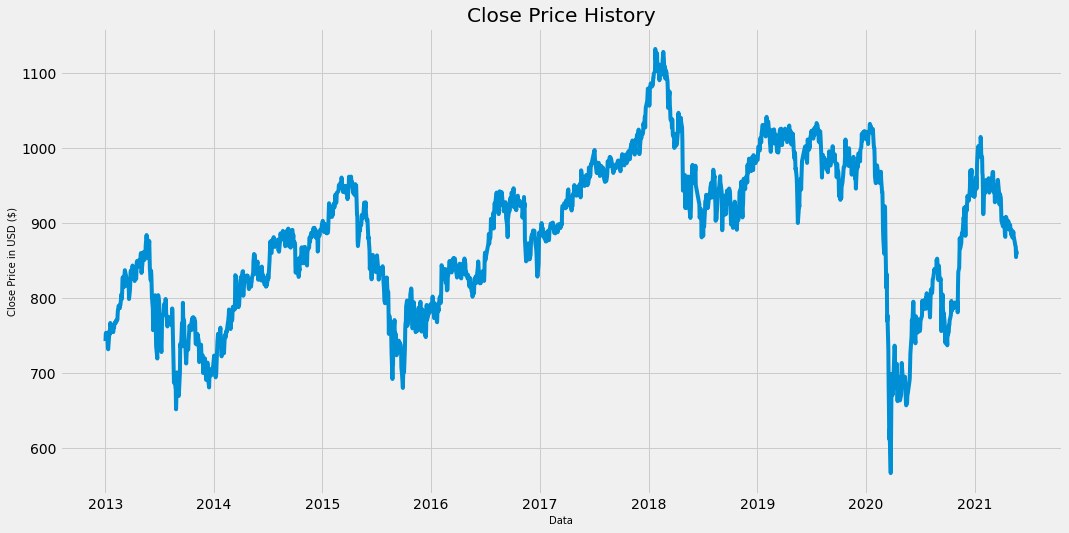

In [ ]:
#visualisasi grafik histori harga penutupan
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=10)
plt.ylabel('Close Price in USD ($)', fontsize=10)
plt.show()

In [ ]:
#Membuat dataframe yang hanya berisi data 'Close'
data=df.filter(['Close'])
dataset=data.values
#jumlah baris yang menjadi model train
training_data_len=math.ceil(len(dataset)* .8)

training_data_len

1630

In [ ]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.31123529],
       [0.32952457],
       [0.33085116],
       ...,
       [0.50928617],
       [0.52302967],
       [0.51559719]])

In [ ]:
#membuat dataset training
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

In [ ]:
for i in range (60, len(train_data)):
  x_train.append(train_data[i-60 : i, 0])
  y_train.append(train_data[i, 0])
  if i<=61 :
    print(x_train)
    print(y_train)
    print()

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1570, 60, 1)

In [ ]:
#LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
#train model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1570/1570 [==============================] - 44s 26ms/step - loss: 0.0105


In [ ]:
#membuat dataset test
test_data=scaled_data[training_data_len - 60: 2037]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60: i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#model prediksi
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

6.846385609019887

In [ ]:
train = data[: training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


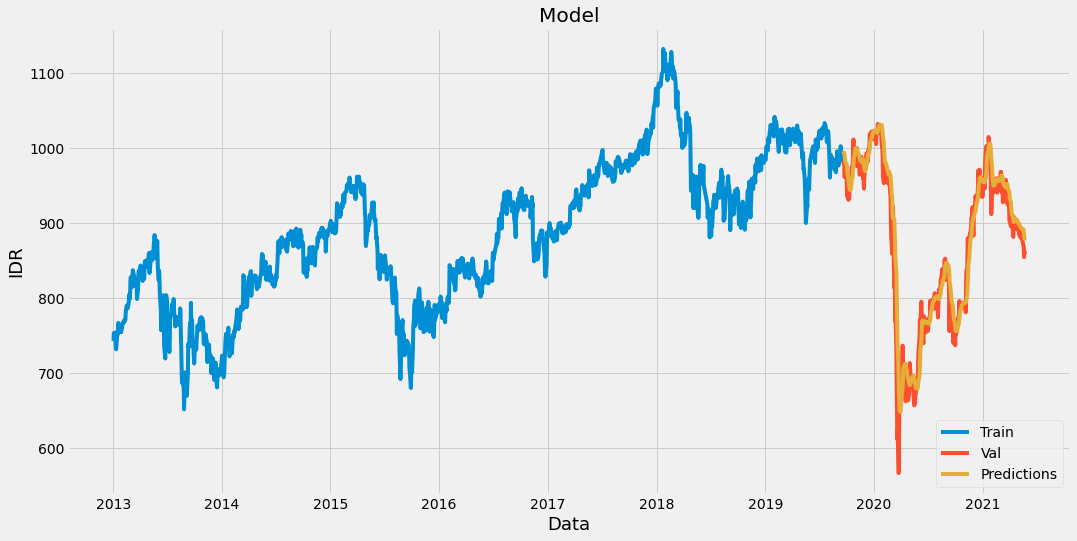

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data',fontsize=18)
plt.ylabel('IDR',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2019-09-19,982.799988,996.117371
2019-09-20,980.770020,995.026794
2019-09-23,976.780029,993.458435
2019-09-24,961.530029,991.339294
2019-09-25,961.130005,987.303345
...,...,...
2021-05-17,869.489990,891.627197
2021-05-18,868.390015,888.991882
2021-05-19,854.760010,885.810852
